##1. Import and prepare data

In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("bank_transactions_data_2.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Check dataset

In [52]:
print(df.info())
print(f"\nStatistical values:\n{df.describe()}")
print(f"\nTotal missing values:\n{df.isna().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Handle missing values

In [53]:
# Fill missing numeric values with median
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Convert date if needed

In [54]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])


Drop irrelevant columns

In [55]:
df = df.drop(columns=["TransactionID", "AccountID", "IP Address", "DeviceID", "MerchantID"])


##2. Create a Target Variable

In [56]:
threshold = df['TransactionAmount'].median()
df['Transaction_Category'] = df['TransactionAmount'].apply(lambda x: 'High' if x > threshold else 'Low')
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Transaction_Category
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,Low
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,High
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,Low
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,Low
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,Low


Encode categorical features

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']:
    df[col] = le.fit_transform(df[col])


In [58]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Transaction_Category
0,14.09,2023-04-11 16:29:14,1,36,0,70,0,81,1,5112.21,2024-11-04 08:08:08,Low
1,376.24,2023-06-27 16:44:19,1,15,0,68,0,141,1,13758.91,2024-11-04 08:09:35,High
2,126.29,2023-07-10 18:16:08,1,23,2,19,3,56,1,1122.35,2024-11-04 08:07:04,Low
3,184.50,2023-05-05 16:32:11,1,33,2,26,3,25,1,8569.06,2024-11-04 08:09:06,Low
4,13.45,2023-10-16 17:51:24,0,1,2,26,3,198,1,7429.40,2024-11-04 08:06:39,Low


##3. Build CART model

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select features
X = df[['TransactionType', 'Location', 'Channel', 'CustomerAge',
        'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]
y = df['Transaction_Category']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


Evaluate model

In [60]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5228628230616302
Confusion Matrix:
 [[149 120]
 [120 114]]
Classification Report:
               precision    recall  f1-score   support

        High       0.55      0.55      0.55       269
         Low       0.49      0.49      0.49       234

    accuracy                           0.52       503
   macro avg       0.52      0.52      0.52       503
weighted avg       0.52      0.52      0.52       503



Visualize model

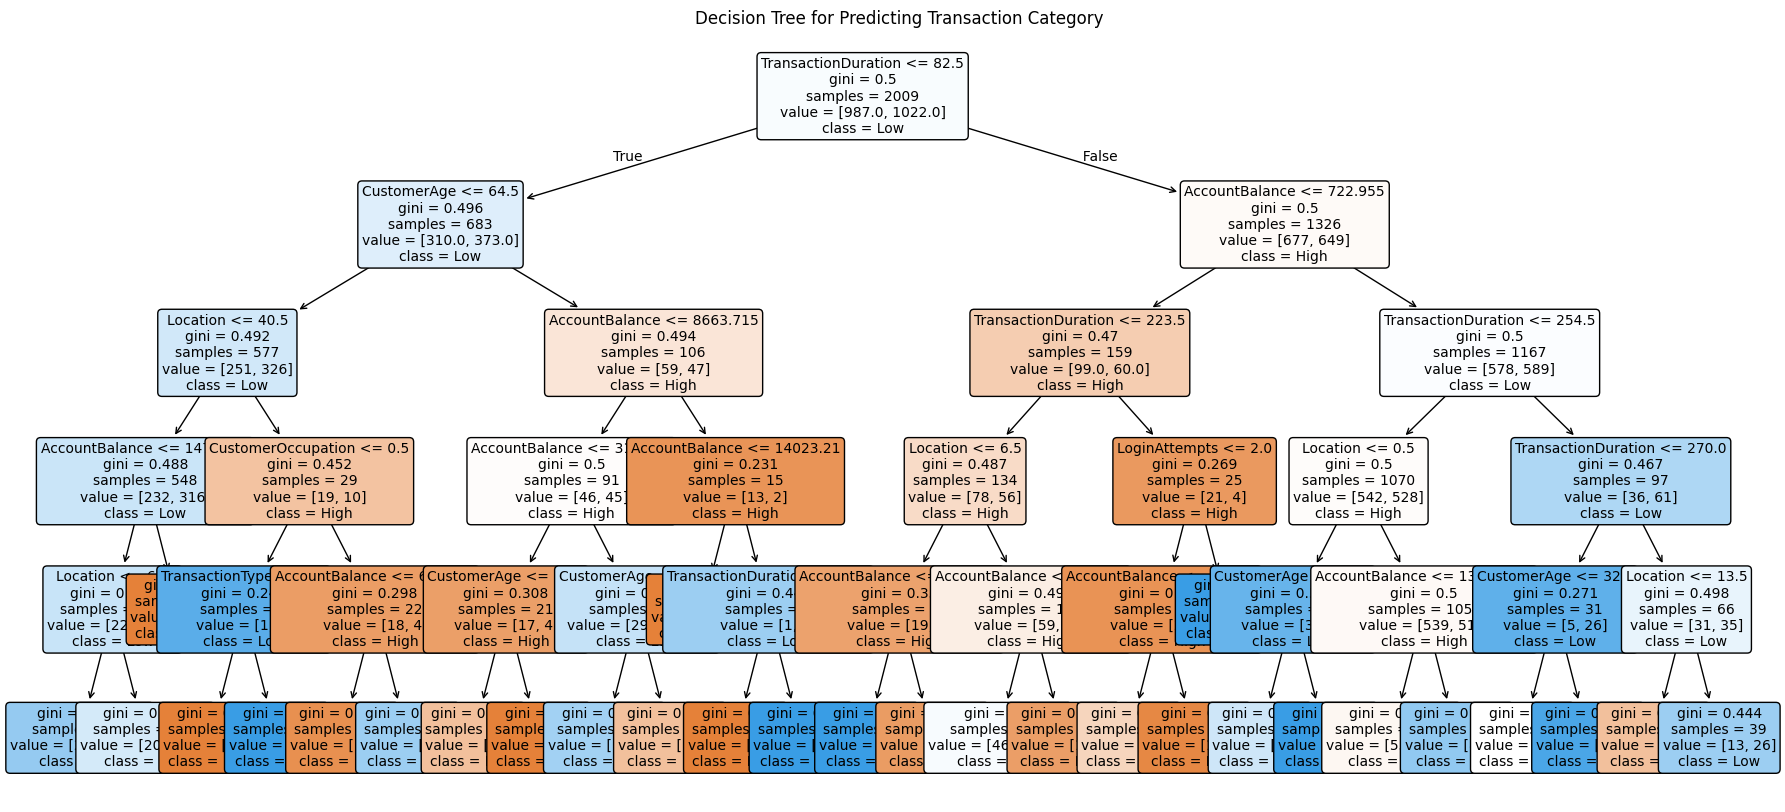

In [61]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(22, 10))  # bigger figure = clearer
plot_tree(
    model,                        # your trained DecisionTreeClassifier
    feature_names=X.columns,      # feature names from your dataset
    class_names=model.classes_,   # labels for the target
    filled=True,                  # color the nodes by majority class
    rounded=True,                 # rounded node edges
    fontsize=10                   # adjust label size
)
plt.title("Decision Tree for Predicting Transaction Category")
plt.show()
